#Types of Classification
Mainly 3 types:
* Binary
* Multiclass
* Multilabel

###Creating Data to view and fit

In [1]:
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


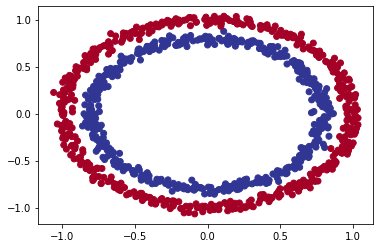

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
#Check input and output shape
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
pd.unique(circles['label'])

array([1, 0])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [10]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

history=model_1.fit(X_train,y_train,epochs=100,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
model_1.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0481 - accuracy: 0.9900


[0.0480673685669899, 0.9900000095367432]

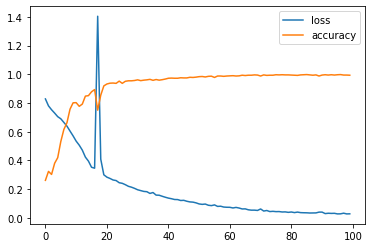

In [12]:
pd.DataFrame(history.history).plot()
plt.xlabel='epochs'

#To visualize our predictions, we create a funtion 'plot_decision_boundary()', this func will:
* Take in trained model,features,labels
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [13]:
import numpy as np

def plot_decision_boundary(model,X,y):
  x_min,x_max=min(X[:,0]) -0.1,max(X[:,0])+0.1
  y_min,y_max=min(X[:,1])-0.1,max(X[:,1])+0.1
  xx,yy=np.meshgrid(np.linspace(x_min, x_max,100),
                   np.linspace(y_min,y_max,100))
  
  x_in=np.c_[xx.ravel(),yy.ravel()] #Stack 1D arrays together along columns, now we have  [x y]

  y_pred=model.predict(x_in)
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    #We need to reshape our predictions to get them ready for plotting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred=np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.8)
  plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing binary classification


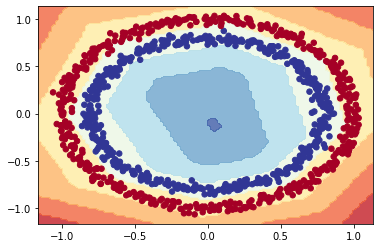

In [14]:
plot_decision_boundary(model=model_1,X=X,y=y)

In [15]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid') #converting them to range (0,1) since it is a binary classification
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

history=model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
29/29 [==============================] - 1s 3ms/step - loss: 0.7025 - accuracy: 0.4811
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5544
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.6300
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6191 - accuracy: 0.7167
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.5690 - accuracy: 0.8744
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.8322
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.9656
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.9656
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.9789
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2573 - accuracy: 0.9956
Epoch 11/

doing binary classification


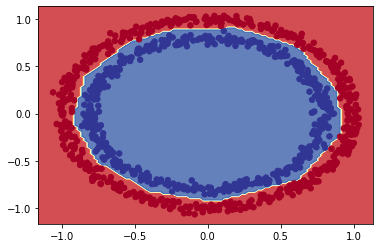

In [16]:
plot_decision_boundary(model=model_2,X=X,y=y)

In [17]:
model_2.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 1.0000


[0.012285936623811722, 1.0]

### Finding optimal Learning Rate



In [18]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
   tf.keras.layers.Dense(10,activation='relu'),
   tf.keras.layers.Dense(1,activation='sigmoid')              
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history=model_3.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
29/29 [==============================] - 1s 3ms/step - loss: 0.7566 - accuracy: 0.4978
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7548 - accuracy: 0.4978
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7528 - accuracy: 0.4978
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7510 - accuracy: 0.4978
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7488 - accuracy: 0.4978
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.4978
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7442 - accuracy: 0.4978
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7418 - accuracy: 0.4978
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7392 - accuracy: 0.4944
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 0.7365 - accuracy: 0.4833
Epoch 11/

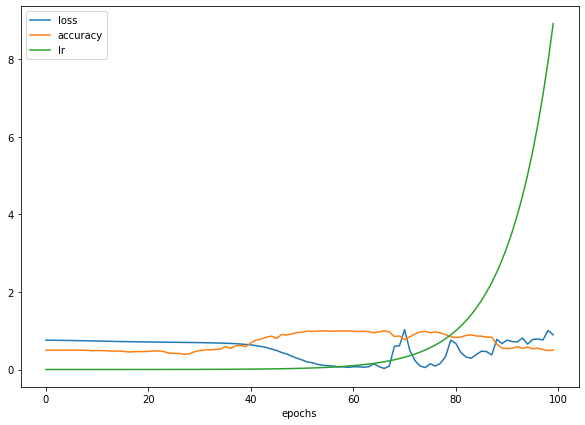

In [19]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

#You can see that the loss decreases faster between epochs 40 and 50

Lets plot loss to learning_rate for better visualization

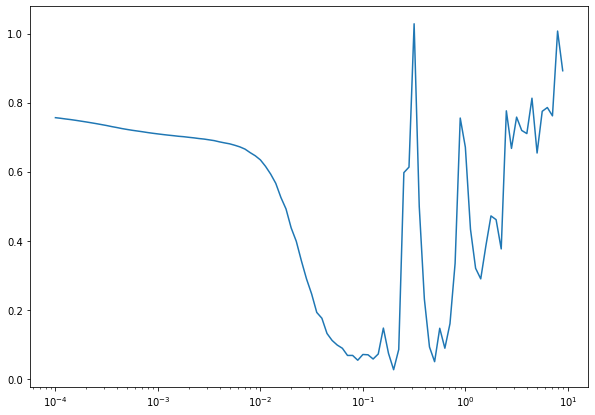

In [20]:
plt.figure(figsize=(10,7))
plt.semilogx(history.history['lr'],history.history['loss'])

There are more evaluation metrics:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion_Matrix

In [21]:
from sklearn.metrics import confusion_matrix

y_preds=model_2.predict(X_test)

confusion_matrix(y_test,y_preds.round())

array([[48,  0],
       [ 0, 52]])

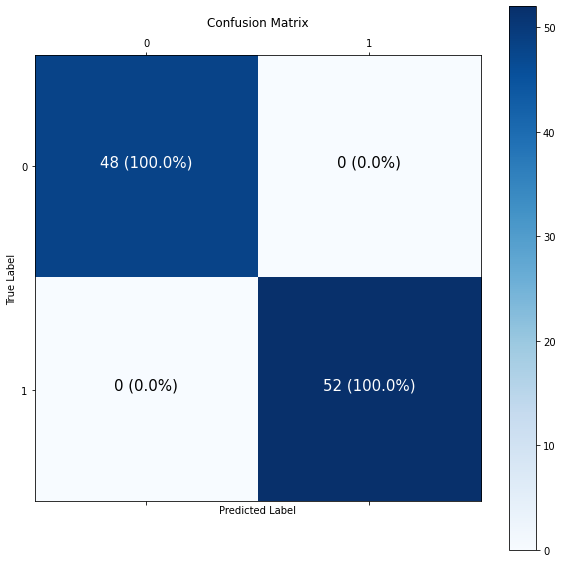

In [26]:
#Let's make a pretty confusion_matrix

import itertools
figsize=(10,10)

#Create the confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]

fig,ax=plt.subplots(figsize=figsize)
#Creatae a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes=False
if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

  ax.set(title='Confusion Matrix',
         xlabel='Predicted Label',
         ylabel='True Label',
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
threshold=(cm.max()+cm.min())/2

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] >threshold else "black",
           size=15)

#Working with Larger Example (Multi-class Classification)

In [28]:
#Let's use built-in dataset in Tensorflow, fashion_mnist

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [31]:
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")
print(train_data[0].shape)

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

5


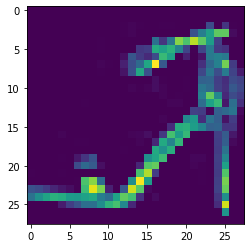

In [35]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[8])
print(train_labels[8])

In [36]:
#Create a small list so we can index onto our training labels so they're human readable

class_names=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
len(class_names) #10 classes in total

10

Text(0.5, 1.0, 'T-shirt/Top')

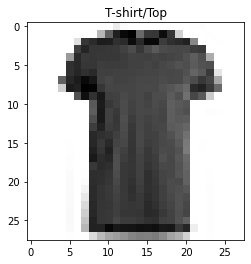

In [39]:
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

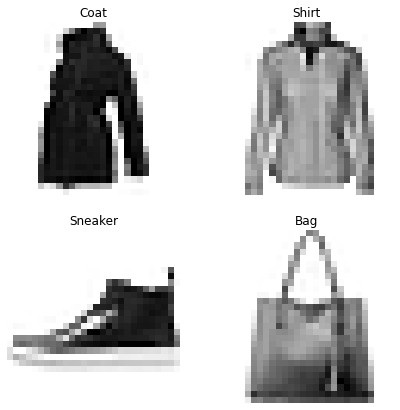

In [47]:
#Let's plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

#Building NN Classification Model
Input shape = 28 x 28

Output shape=10(total classes)

loss Function=tf.keras.losses.CategoricalCrosssentropy() if labels are one hot encoded
tf.keras.losses.SparseCategoricalCrossentropy() if labels are integers

Output Layer activation=softmax(not sigmoid) since Multi-class

In [58]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

multi_history=model.fit(train_data,tf.one_hot(train_labels,depth=10),validation_data=(test_data,tf.one_hot(test_labels,depth=10)),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1770 - accuracy: 0.1583 - val_loss: 1.7975 - val_accuracy: 0.2047
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7107 - accuracy: 0.2470 - val_loss: 1.6502 - val_accuracy: 0.2860
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6342 - accuracy: 0.2811 - val_loss: 1.6190 - val_accuracy: 0.2973
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6093 - accuracy: 0.2864 - val_loss: 1.6037 - val_accuracy: 0.2973
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5999 - accuracy: 0.2967 - val_loss: 1.5803 - val_accuracy: 0.3029
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5913 - accuracy: 0.3084 - val_loss: 1.5790 - val_accuracy: 0.3056
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5780 - accuracy: 0.3208 - val_loss: 1.5642 - val_accuracy:

#Let's improve the model now
Neural Networks prefer data to be scaled(or Normalized)

In [63]:
train_data.min(),train_data.max()

(0, 255)

In [64]:
norm_train_data=train_data/255
norm_test_data=test_data/255

In [65]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_history=model_1.fit(norm_train_data,train_labels,epochs=10,validation_data=(norm_test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Clearly accuracy shot up from 35 to 80 

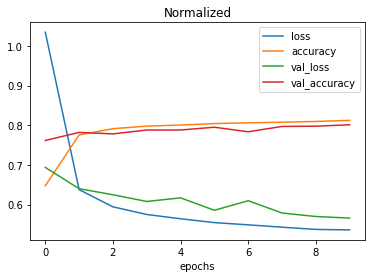

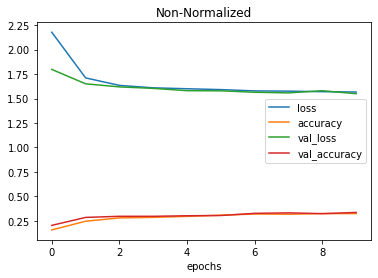

In [68]:
pd.DataFrame(model_1_history.history).plot(title='Normalized',xlabel='epochs')
pd.DataFrame(multi_history.history).plot(title='Non-Normalized',xlabel='epochs')

##Let's improve LR now

In [69]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

model_2_history=model_2.fit(norm_train_data,train_labels,
                            epochs=40,
                            validation_data=(norm_test_data,test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

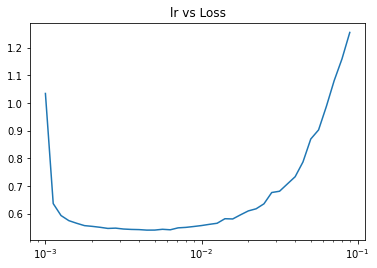

In [72]:
plt.semilogx(model_2_history.history['lr'],model_2_history.history['loss'])
plt.title("lr vs Loss")
plt.show()

In [73]:
pd.DataFrame(model_2_history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.034784,0.647433,0.693733,0.7617,0.001000
1,0.636577,0.775900,0.640036,0.7808,0.001122
2,0.593379,0.791150,0.627756,0.7770,0.001259
3,0.574939,0.796950,0.612175,0.7871,0.001413
4,0.565479,0.798683,0.606124,0.7913,0.001585
5,0.556948,0.802217,0.591709,0.7940,0.001778
6,0.554244,0.803567,0.589831,0.7896,0.001995
7,0.550886,0.803867,0.582860,0.7949,0.002239
8,0.546799,0.804667,0.603628,0.7833,0.002512
9,0.547823,0.805800,0.573599,0.7974,0.002818


In [89]:
#Let's use lr range =[0.001,0.002]

tf.random.set_seed(42)

model_3=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
                metrics=['accuracy'])

model_3_history=model_3.fit(norm_train_data,train_labels,epochs=20,validation_data=(norm_test_data,test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7996 - accuracy: 0.7201 - val_loss: 0.5759 - val_accuracy: 0.7999
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5144 - accuracy: 0.8267 - val_loss: 0.5252 - val_accuracy: 0.8159
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4651 - accuracy: 0.8398 - val_loss: 0.4920 - val_accuracy: 0.8301
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4396 - accuracy: 0.8485 - val_loss: 0.4738 - val_accuracy: 0.8367
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4254 - accuracy: 0.8514 - val_loss: 0.4833 - val_accuracy: 0.8307
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4146 - accuracy: 0.8548 - val_loss: 0.4947 - val_accuracy: 0.8293
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4074 - accuracy: 0.8578 - val_loss: 0.4652 - val_accuracy:

#What patterns is our Model Learning?

In [90]:
model_3.layers # Get the layers in our recent model

In [101]:
#Get the patterns of a layer in a network
weights,biases=model_3.layers[1].get_weights() #weights and biases of first layer

weights,biases

(array([[ 0.3111714 , -0.01025646, -0.7393994 , ...,  0.06475256,
          0.59107333, -0.01443376],
        [ 0.3143965 ,  0.08356188, -0.8118868 , ...,  0.93379956,
          0.2754079 , -0.0623513 ],
        [ 0.4187144 ,  0.22246967, -1.1956781 , ...,  0.78954667,
          0.10957618,  1.0874163 ],
        ...,
        [ 0.27794218,  0.4124632 , -0.7049973 , ..., -0.10597493,
          0.6180946 ,  0.21504807],
        [ 0.34637353,  0.7962631 , -0.4985205 , ...,  0.89137846,
          0.4648852 ,  0.58488894],
        [ 0.06300188,  0.68992984, -0.6560622 , ...,  0.37311664,
         -0.0835055 ,  0.32318464]], dtype=float32),
 array([ 0.9454713 ,  3.1836574 ,  0.37411442,  0.52168363,  0.8028446 ,
        -0.69511306,  1.1063788 , -0.31345457,  1.0590758 ,  0.83716065],
       dtype=float32))

In [96]:
weights.shape

(784, 10)

### Each neuron calculates (previous_layer_output * weights) + bias
Now let's check out the bias vector

In [97]:
biases,biases.shape

(array([ 0.9454713 ,  3.1836574 ,  0.37411442,  0.52168363,  0.8028446 ,
        -0.69511306,  1.1063788 , -0.31345457,  1.0590758 ,  0.83716065],
       dtype=float32), (10,))

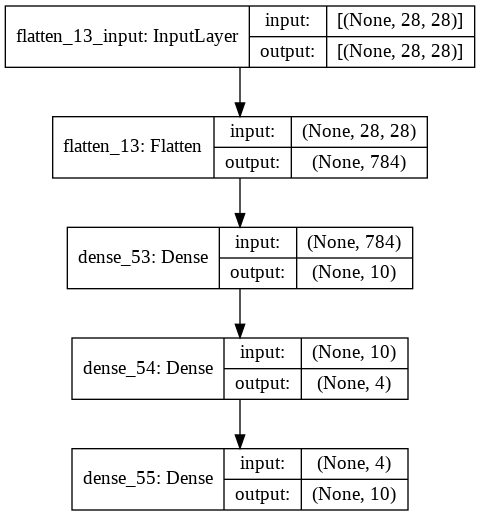

In [99]:
#Let's check another way to view our model
from tensorflow.keras.utils import plot_model
plot_model(model_3,show_shapes=True)